In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
278,59,male,31.790,2,no,southeast,12928.79110
175,63,female,37.700,0,yes,southwest,48824.45000
744,50,male,26.410,0,no,northwest,8827.20990
975,29,male,22.895,0,yes,northeast,16138.76205
583,32,female,23.650,1,no,southeast,17626.23951


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

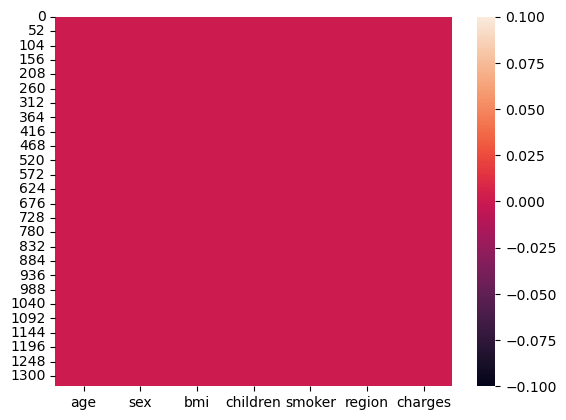

In [9]:
sns.heatmap(df.isnull())

In [10]:
print (df['charges'].unique())
print (df['charges'].nunique())

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
1337


In [11]:
df.nunique().to_frame('No of unique value')

,No of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [12]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

# Univariate Analysis

<Axes: ylabel='Frequency'>

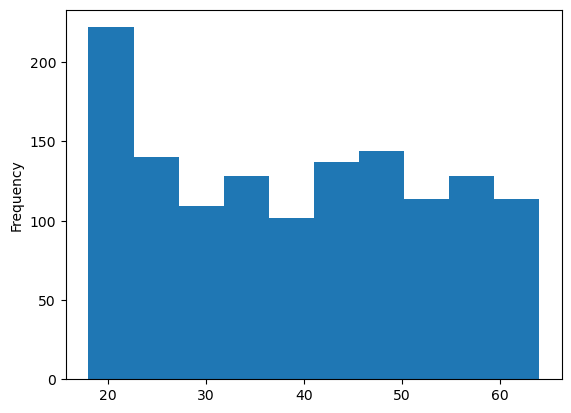

In [13]:
df['age'].plot.hist()

male      676
female    662
Name: sex, dtype: int64


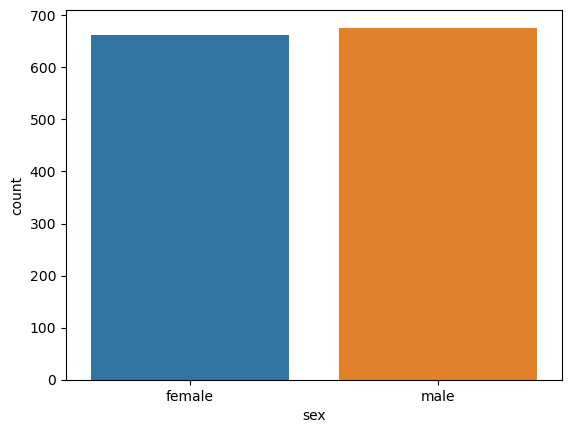

In [14]:
sns.countplot(df,x='sex')
print (df['sex'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


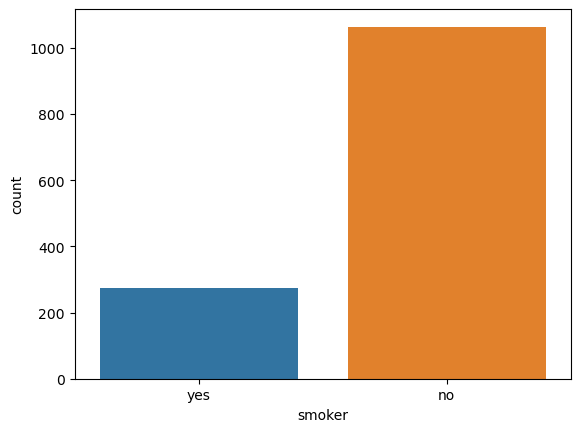

In [15]:
sns.countplot(df,x='smoker')
print (df['smoker'].value_counts())

<Axes: xlabel='bmi', ylabel='Density'>

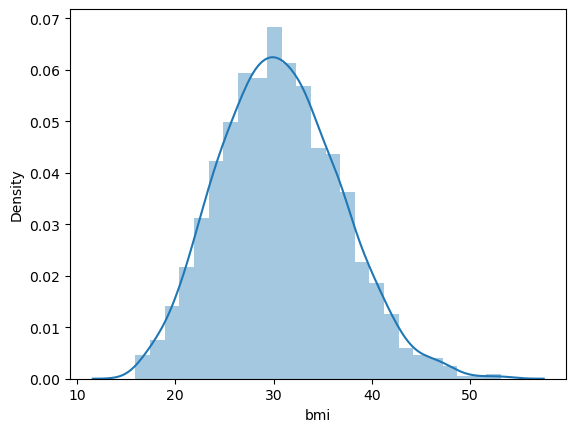

In [16]:
sns.distplot(df['bmi'])

<Axes: xlabel='region', ylabel='count'>

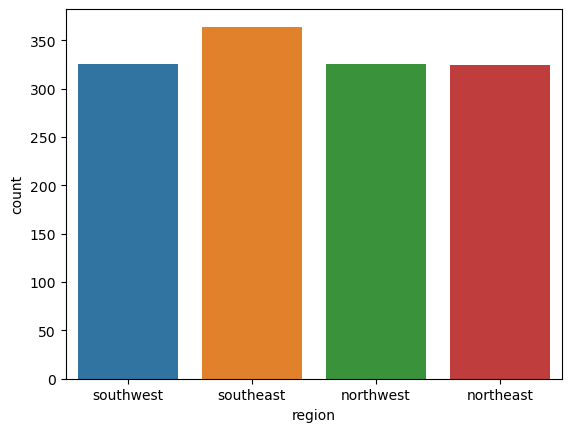

In [17]:
sns.countplot(df,x='region')

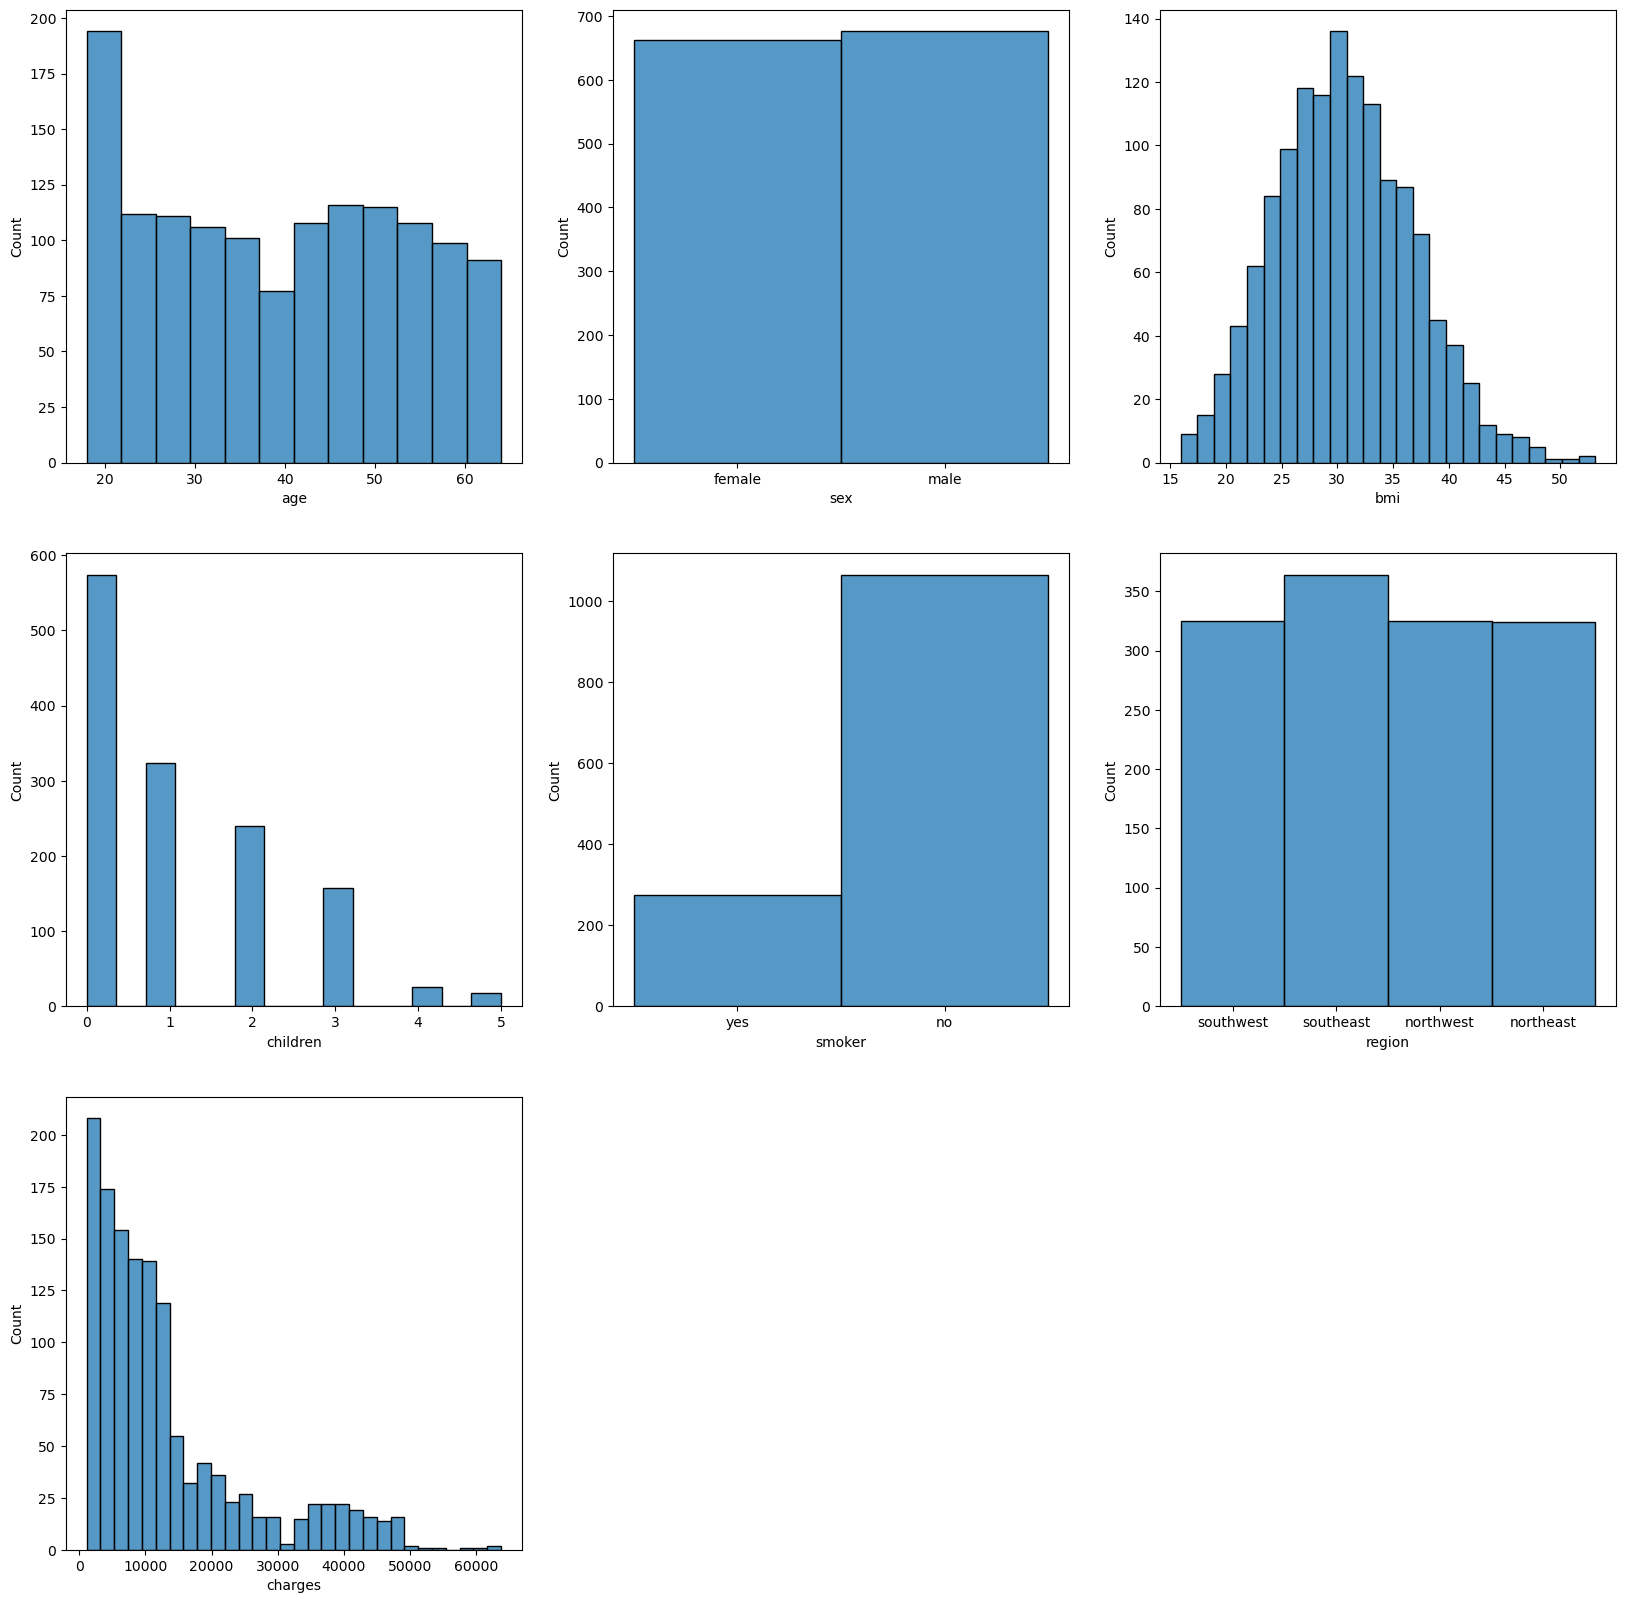

In [18]:
plt.figure(figsize=(20,20))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(3,3,p)
        sns.histplot(df[i])
        plt.xlabel(i)
    p+=1
plt.show()

# Bivairate Analysis

<Axes: xlabel='bmi', ylabel='charges'>

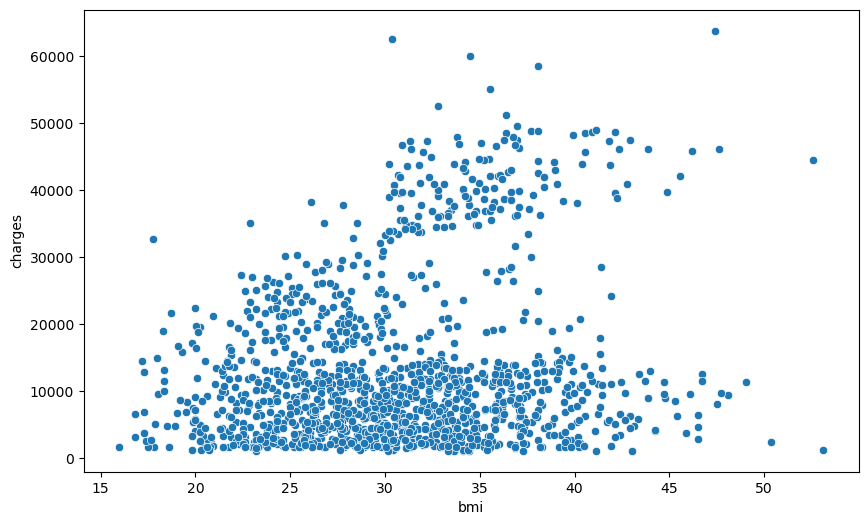

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(df,x='bmi',y='charges',palette='bright')

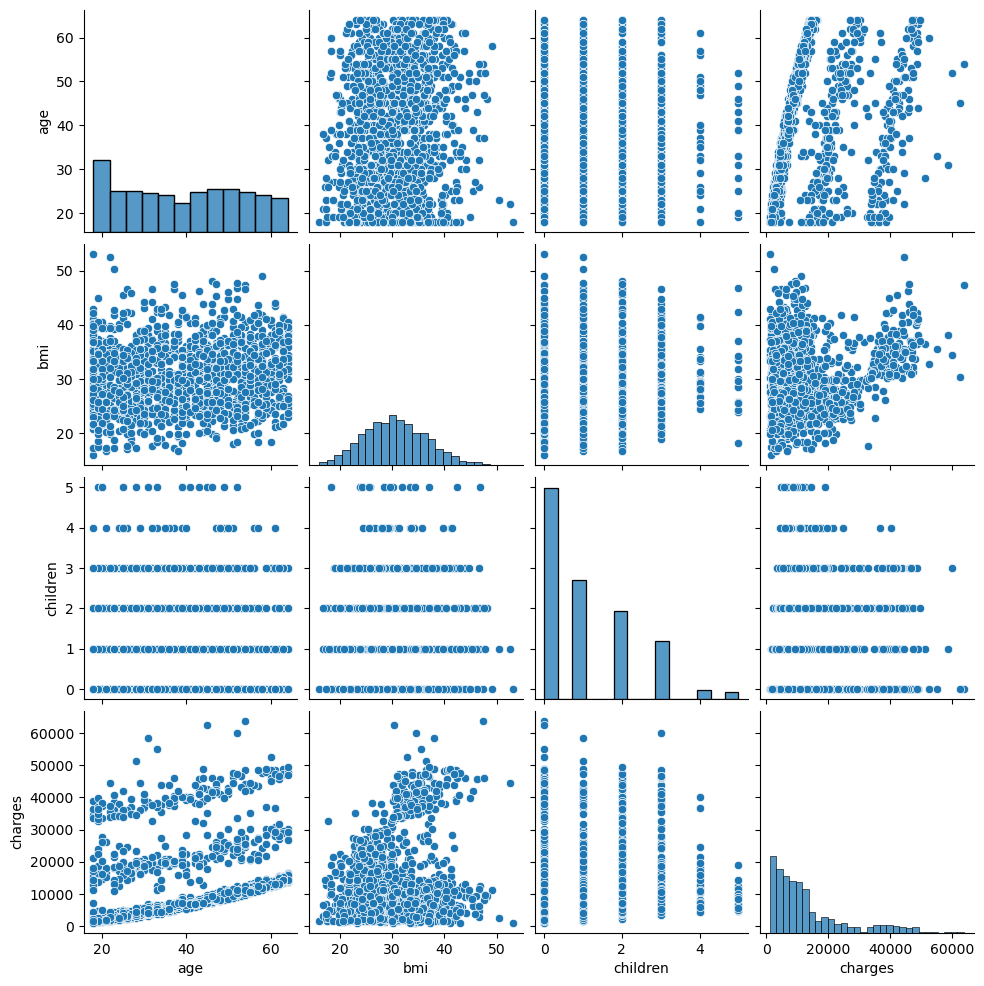

In [20]:
sns.pairplot(df)

In [21]:
catagorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catagorical_col.append(i)
print ("Catagorical column:",catagorical_col)

Numarical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        Numarical_col.append(i)
print ("Numarical Columns:",Numarical_col)
        

        

Catagorical column: ['sex', 'smoker', 'region']
Numarical Columns: ['age', 'bmi', 'children', 'charges']


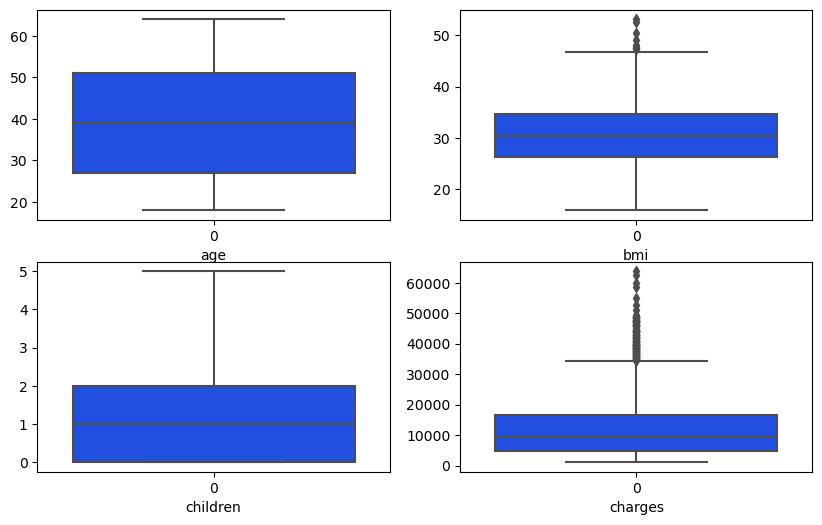

In [22]:
plt.figure(figsize=(10,6))
p=1
for i in Numarical_col:
    if p<=4:
        plt.subplot(2,2,p)
        sns.boxplot(df[i],palette='bright')
        plt.xlabel(i)
    p+=1
plt.show()

# Skewness Checking

In [23]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Remove Skewness

In [24]:
df['charges']=np.sqrt(df['charges'])
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     0.795863
dtype: float64

<Axes: ylabel='Frequency'>

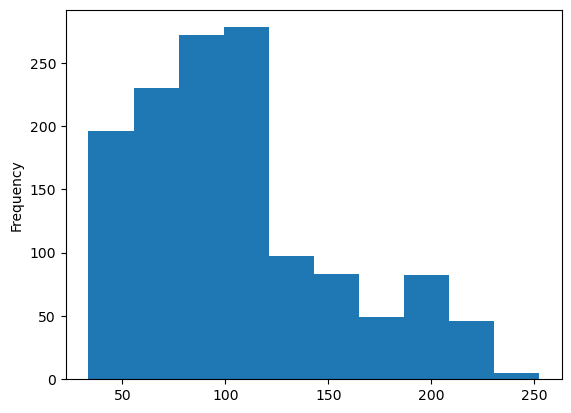

In [25]:
df['charges'].plot.hist()

# Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['sex','smoker','region']
for i in list1:
    df[i]=le.fit_transform(df[i])


In [27]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
485,31,0,31.065,0,0,0,65.931960
41,31,0,36.630,2,0,2,70.354522
1204,18,0,27.280,3,1,2,134.994264
646,39,1,26.220,1,0,1,78.253235
687,40,1,41.690,0,0,2,73.747875


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


# Remove outliers

In [29]:
import scipy
from scipy.stats import zscore

In [30]:
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.525799
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,1.325445
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.798472
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.909642
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.893131
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.039257
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,1.211775
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,1.349917
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,1.256961


In [31]:
print (np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  543,  568,  640,  847,
        877,  932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272,
       1300, 1317], dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 6, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       6, 2], dtype=int64))


In [32]:
z.iloc[32,3]

3.240618711442044

In [33]:
thresold=3
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,129.942002
1,18,1,33.770,1,0,2,41.539768
2,28,1,33.000,3,0,2,66.704288
3,33,1,22.705,0,0,1,148.271611
4,32,1,28.880,0,0,1,62.184043
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,102.958964
1334,18,0,31.920,0,0,0,46.967870
1335,18,0,36.850,0,0,2,40.371196
1336,21,0,25.800,0,0,3,44.810099


In [34]:
df=df_new
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,129.942002
1,18,1,33.770,1,0,2,41.539768
2,28,1,33.000,3,0,2,66.704288
3,33,1,22.705,0,0,1,148.271611
4,32,1,28.880,0,0,1,62.184043
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,102.958964
1334,18,0,31.920,0,0,0,46.967870
1335,18,0,36.850,0,0,2,40.371196
1336,21,0,25.800,0,0,3,44.810099


# Correlation Check

In [35]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,39.267884,0.503044,30.602599,1.044901,0.205479,1.506088,104.802212
std,14.080924,0.500181,5.972506,1.124521,0.404205,1.105429,47.636483
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,33.494386
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,68.691584
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,96.959646
75%,51.000000,1.000000,34.600000,2.000000,0.000000,2.000000,129.581572
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,244.992651


In [36]:
df_cor=df.corr()
df_cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017202,0.117250,0.059412,-0.028011,0.004250,0.410230
sex,-0.017202,1.000000,0.042271,0.015329,0.079780,0.006165,0.039743
bmi,0.117250,0.042271,1.000000,0.029768,0.000872,0.159097,0.169818
children,0.059412,0.015329,0.029768,1.000000,0.028278,-0.004203,0.133664
smoker,-0.028011,0.079780,0.000872,0.028278,1.000000,-0.002802,0.754239
region,0.004250,0.006165,0.159097,-0.004203,-0.002802,1.000000,-0.024438
charges,0.410230,0.039743,0.169818,0.133664,0.754239,-0.024438,1.000000


<Axes: >

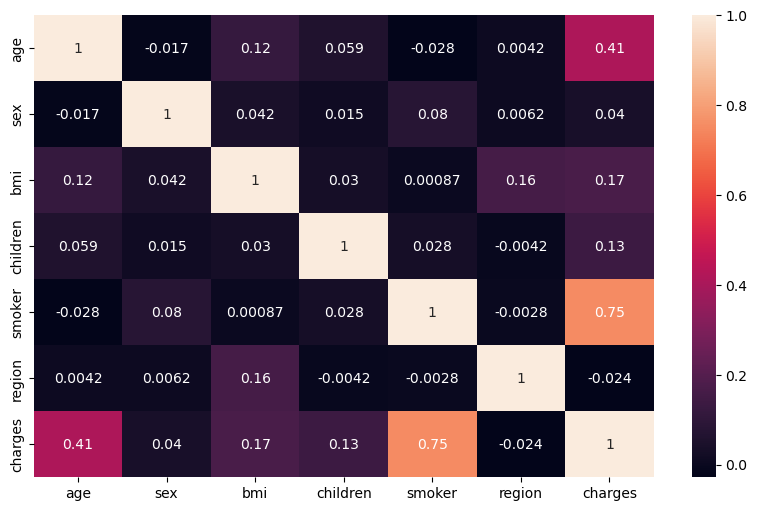

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,annot=True)

# Scaling Techinique

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [40]:
print (x.shape)
print (y.shape)

(1314, 6)
(1314,)


In [41]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439934,-1.006107,-0.452679,-0.929550,1.966384,1.351946
1,-1.510979,0.993930,0.530532,-0.039944,-0.508548,0.446976
2,-0.800528,0.993930,0.401559,1.739268,-0.508548,0.446976
3,-0.445302,0.993930,-1.322829,-0.929550,-0.508548,-0.457995
4,-0.516348,0.993930,-0.288531,-0.929550,-0.508548,-0.457995
...,...,...,...,...,...,...
1309,0.762464,0.993930,0.061539,1.739268,-0.508548,-0.457995
1310,-1.510979,-1.006107,0.220662,-0.929550,-0.508548,-1.362965
1311,-1.510979,-1.006107,1.046425,-0.929550,-0.508548,0.446976
1312,-1.297844,-1.006107,-0.804424,-0.929550,-0.508548,1.351946


# VIF Checking

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=pd.DataFrame()
vif['vif Factor']=[variance_inflation_factor (x.values,i) for i in range(len(x.columns))]
vif['Feature']=x.columns
vif

,vif Factor,Feature
0,1.018733,age
1,1.008794,sex
2,1.043078,bmi
3,1.005211,children
4,1.007971,smoker
5,1.026271,region


# Model build

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [45]:
maxAcc=0
maxRE=0

for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit (x_train,y_train)
    predict_lr=lr.predict(x_test)
    acc=r2_score(y_test,predict_lr)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRE=i
        
print ("Maximum r2_score:",maxAcc,"Best Random_Estate:",maxRE)

Maximum r2_score: 0.8345826023302085 Best Random_Estate: 38


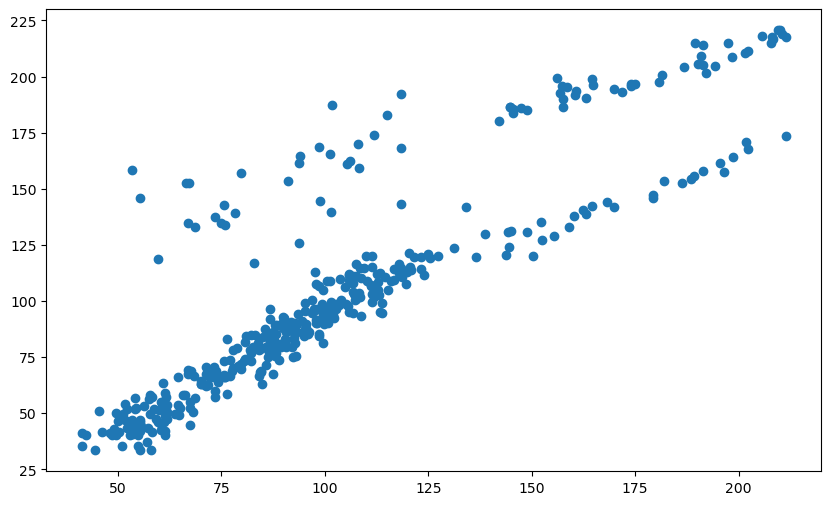

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(x=predict_lr,y=y_test)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [78]:
lr=LinearRegression()
lr.fit (x_train,y_train)
predict_lr=lr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_lr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_lr))
print ("Mean squared error:",mean_squared_error(y_test,predict_lr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_lr)))


R2 Score: 0.7652867887288242
Mean absolute error: 15.326404778268532
Mean squared error: 543.8806967932819
Root mean squared error: 23.321249897749517


In [53]:
gbr=GradientBoostingRegressor()
gbr.fit (x_train,y_train)
predict_gbr=gbr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_gbr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_gbr))
print ("Mean squared error:",mean_squared_error(y_test,predict_gbr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_gbr)))


R2 Score: 0.8234168922178366
Mean absolute error: 10.382045372624425
Mean squared error: 409.18081765549283
Root mean squared error: 20.22821835099406


In [55]:
rfr=RandomForestRegressor()
rfr.fit (x_train,y_train)
predict_rfr=rfr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_rfr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_rfr))
print ("Mean squared error:",mean_squared_error(y_test,predict_rfr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_rfr)))

R2 Score: 0.8161561701152007
Mean absolute error: 10.573153682844064
Mean squared error: 426.00546325178004
Root mean squared error: 20.63989978783279


In [56]:
dtr=DecisionTreeRegressor()
dtr.fit (x_train,y_train)
predict_dtr=dtr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_dtr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_dtr))
print ("Mean squared error:",mean_squared_error(y_test,predict_dtr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_dtr)))

R2 Score: 0.7222490237097716
Mean absolute error: 11.628362366546577
Mean squared error: 643.6084006588477
Root mean squared error: 25.369438319735178


In [57]:
knr=KNeighborsRegressor()
knr.fit (x_train,y_train)
predict_knr=knr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_knr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_knr))
print ("Mean squared error:",mean_squared_error(y_test,predict_knr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_knr)))

R2 Score: 0.7871785531308565
Mean absolute error: 13.495092305469012
Mean squared error: 493.15279778611637
Root mean squared error: 22.207043877700524


In [58]:
svr=SVR()
svr.fit (x_train,y_train)
predict_svr=svr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_svr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_svr))
print ("Mean squared error:",mean_squared_error(y_test,predict_svr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_svr)))

R2 Score: 0.5962182659096361
Mean absolute error: 17.443428562287046
Mean squared error: 935.6486143242334
Root mean squared error: 30.588373842429633


In [59]:
etr=ExtraTreesRegressor()
etr.fit (x_train,y_train)
predict_etr=etr.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_etr))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_etr))
print ("Mean squared error:",mean_squared_error(y_test,predict_etr))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_etr)))

R2 Score: 0.8021278975866066
Mean absolute error: 10.277342984095617
Mean squared error: 458.51197021973616
Root mean squared error: 21.412892616826344


In [60]:
ls=Lasso()
ls.fit (x_train,y_train)
predict_ls=ls.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_ls))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_ls))
print ("Mean squared error:",mean_squared_error(y_test,predict_ls))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_ls)))

R2 Score: 0.7604423006961782
Mean absolute error: 15.776021792080561
Mean squared error: 555.1064114112718
Root mean squared error: 23.56069632696096


In [61]:
rg=Ridge()
rg.fit (x_train,y_train)
predict_rg=rg.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_rg))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_rg))
print ("Mean squared error:",mean_squared_error(y_test,predict_rg))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_rg)))

R2 Score: 0.7652486072541106
Mean absolute error: 15.34009427576364
Mean squared error: 543.9691714341398
Root mean squared error: 23.32314668808949


In [62]:
sgd=SGDRegressor()
sgd.fit (x_train,y_train)
predict_sgd=sgd.predict(x_test)
print ("R2 Score:",r2_score(y_test,predict_sgd))
print ("Mean absolute error:",mean_absolute_error(y_test,predict_sgd))
print ("Mean squared error:",mean_squared_error(y_test,predict_sgd))
print ("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predict_sgd)))

R2 Score: 0.7652794972335079
Mean absolute error: 15.393272100170249
Mean squared error: 543.8975927469941
Root mean squared error: 23.32161213867931


# CROSS VALIDATION

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
score=cross_val_score(lr,x,y)
print (score)
print (score.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_lr) - score.mean())

[0.80043019 0.71714936 0.8176441  0.76317695 0.77929961]
0.775540039496619
Difference between R2 score and cross validation score: -0.01025325076779482


In [68]:
score1=cross_val_score(gbr,x,y)
print (score1)
print (score1.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_gbr) - score1.mean())

[0.8682359  0.76477638 0.88101154 0.83388672 0.83695366]
0.8369728403688711
Difference between R2 score and cross validation score: -0.013555948151034447


In [69]:
score2=cross_val_score(rfr,x,y)
print (score2)
print (score2.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_rfr) - score2.mean())

[0.83906761 0.73582185 0.83160359 0.81207852 0.82587106]
0.8088885259192844
Difference between R2 score and cross validation score: 0.007267644195916301


In [70]:
score3=cross_val_score(dtr,x,y)
print (score3)
print (score3.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_dtr) - score3.mean())

[0.74297327 0.59445466 0.61861087 0.71229568 0.60178181]
0.6540232582411002
Difference between R2 score and cross validation score: 0.06822576546867143


In [71]:
score4=cross_val_score(knr,x,y)
print (score4)
print (score4.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_knr) - score4.mean())

[0.83599849 0.73300836 0.82557014 0.80141751 0.81297622]
0.8017941459533044
Difference between R2 score and cross validation score: -0.014615592822447954


In [72]:
score5=cross_val_score(svr,x,y)
print (score5)
print (score5.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_svr) - score5.mean())

[0.66444711 0.59514741 0.67589626 0.63303864 0.61632371]
0.6369706272752067
Difference between R2 score and cross validation score: -0.04075236136557059


In [73]:
score6=cross_val_score(etr,x,y)
print (score6)
print (score6.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_etr) - score6.mean())

[0.81354305 0.70433942 0.82001629 0.79324201 0.81328789]
0.7888857327964708
Difference between R2 score and cross validation score: 0.013242164790135846


In [74]:
score7=cross_val_score(ls,x,y)
print (score7)
print (score7.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_ls) - score7.mean())

[0.79896134 0.72098945 0.80798073 0.76029548 0.77807593]
0.7732605866596811
Difference between R2 score and cross validation score: -0.012818285963502873


In [76]:
score8=cross_val_score(rg,x,y)
print (score8)
print (score8.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_rg) - score8.mean())

[0.80039525 0.71726312 0.81752727 0.76323361 0.77929383]
0.7755426138360244
Difference between R2 score and cross validation score: -0.010294006581913817


In [77]:
score9=cross_val_score(sgd,x,y)
print (score9)
print (score9.mean())
print ("Difference between R2 score and cross validation score:", r2_score(y_test,predict_sgd) - score9.mean())

[0.80031488 0.71636188 0.81704149 0.76271553 0.77924726]
0.7751362066268508
Difference between R2 score and cross validation score: -0.009856709393342933


# Saving the Best Model

In [82]:
import joblib

In [83]:
joblib.dump(gbr,'GradientBoost_model.obj')

['GradientBoost_model.obj']

# Checking the model

In [84]:
Best_fit_model=joblib.load('GradientBoost_model.obj')

In [85]:
def predictval(p):
    p=p.reshape (1,-1)
    pred=Best_fit_model.predict (p)
    print ("Predict Value:",pred)
    
    


In [86]:
p=np.array([-1.547934,-1.045797,-1.452679,-0.941750,1.972384,1.357496])
predictval(p)

Predict Value: [122.7210816]
